# Pipeline Examples

## 1. Introduction

Machine Learning problem commonly involves two steps. First, we sequentially transform the data comprising of several steps such as feature transformation,dimensionality reduction, standardization etc. Secondly, we learn from the data by using an estimator or regressor to gain insights.

Pipeline simplifies the use of Machine learning model by combining various data transformation part with the data estimation part into single unit.In this notebook, We will illustrate the use of pipeline in Sci-Kit Learn library through examples.

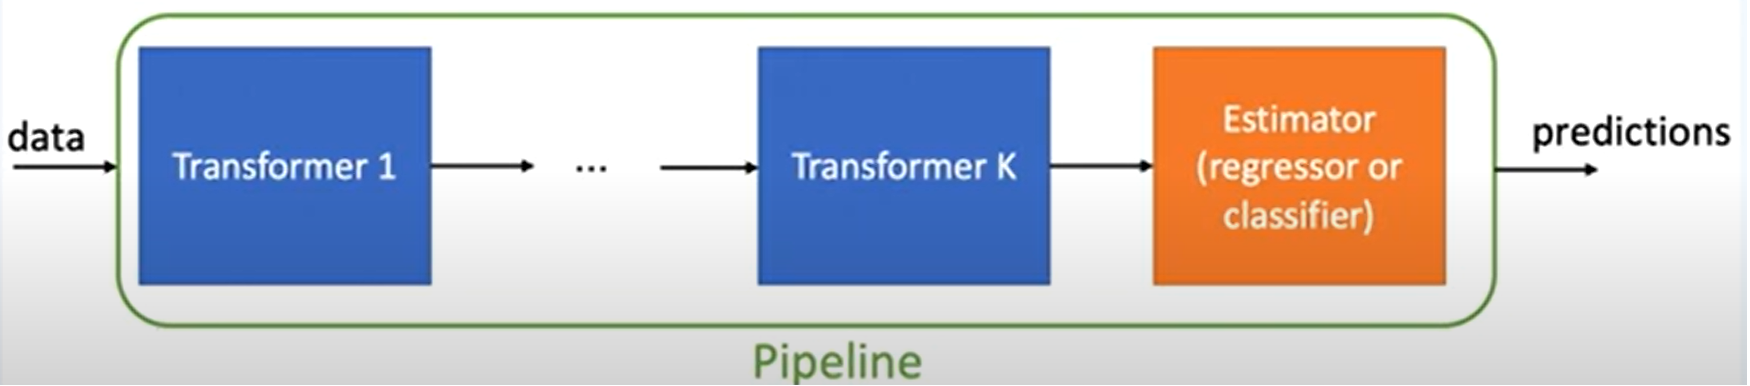

## 2. Examples

#### <p style="color:red"> Example1: Linear regression on Sinusoids </p>

##### Generate Training Data

- For the training data, we will use single feature as input and the response is a      
  sinusoidal function of input feature (Y = X + sin(X))
- We will add some noise to the response to make it realistic for later predictions



In [1]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.linspace(0, 10 * np.pi, num=1000); # input feature
noise = np.random.normal(scale=3, size=X_train.size); # additive noise
y_train = X_train + 10 * np.sin(X_train)+ noise; # response variable
plt.scatter(X_train,y_train,color='g'); # visualize the dataset
plt.xlabel('training feature');
plt.ylabel('training response');

##### Generate Test Data

In [2]:
X_test = np.linspace(10, 15 * np.pi, num=100); # test data is again a linear array
noise = np.random.normal(scale=3, size=X_test.size); # we add noise sameway as we did for train
y_true = X_test + 10 * np.sin(X_test)+ noise; # true response desired from test data
plt.scatter(X_test,y_true,color='g'); # visualize test feature and test response
plt.xlabel('test feature');
plt.ylabel('test response');

##### Linear Regression (without using feature engineering)

- Now let us blindly use linear regression on the example1 data to
  see how it fits the data

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression();
model.fit(X_train.reshape(-1,1),y_train.reshape(-1,1));
y_pred = model.predict(X_test.reshape(-1,1));
plt.scatter(X_test,y_true,color = 'g');
plt.plot(X_test,y_pred,color = 'r');
plt.xlabel('test feature');
plt.ylabel('Linear regression fit');

##### Inference

- Now ofcourse Linear regression without feature transformation did not do
  a great job.
- Next we will use sine transform on the input feature and then use pipeline
  to illustrate the linear regression on transformed feature in one go.

#### Using Pipeline for Linear Regression on transformed feature

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# this function transforms input feature into sine function
def sine_transform(X):
    y = X+10*np.sin(X);
    return y
    
# here we define the pipeline for transformation and estimation in one unit
pipe = Pipeline([('sine_transform',FunctionTransformer(sine_transform)),
                 ('estimator',LinearRegression())]);

pipe.fit(X_train.reshape(-1,1),y_train.reshape(-1,1));
y_pred2 = pipe.predict(X_test.reshape(-1,1));

plt.scatter(X_test,y_true,color='g');
plt.plot(X_test,y_pred2,'r');
plt.xlabel('test feature');
plt.ylabel('Fit on sine transformed feature');


##### Conclusion on Example1

- Here, we illustrated how we could combine feature engineering and   estimators in one-go using sci-kit pipeline.
- Sine transformation on input feature resulted in amazing fit/predictions.
- Hence, simple linear regression can be very powerful, if we know our data and properly 
  engineer it before the estimation stage.
 

#### <p style="color:red"> Example2: Cancer dataset classification </p>

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.svm import SVC

cancer = load_breast_cancer();
print("shape of cancer data :{}".format(cancer.data.shape));

In [6]:
target = cancer.target;
ax = sns.countplot(x = target, label="Count", palette="muted")
print('Number of benign cancer: ', len(target[target==1]));
print('Number of malignant cancer: ', len(target[target==0]));
ax.set_xticks([0,1],['malignant','benign']);

- create training and test datasets

In [7]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target, random_state=10);
print("X_train dimensions : {}".format(X_train.shape))
print("y_train dimensions : {}".format(y_train.shape))


- we have 30 features and one target to be classified.

##### Building pipeline

- Here we will choose SVM estimator. Since SVM is sensitive to data scaling, we will use minmax scaler.
- Our objective is to combine scaling with SVM as a single unit using pipeline.

In [8]:
pipe = Pipeline([("scaler",MinMaxScaler()),("svm_classifier",SVC())]);

- Now we have our pipeline, we can estimate the accuracy of our SVC model.

In [9]:
pipe.fit(X_train,y_train)
test_score = pipe.score(X_test,y_test);
print("test_score: {:.3f}".format(test_score))

#### Using pipe to tune hyperparameters of SVM

- Before we can run our gridsearch, we need to associate each parameters with the specific part of
  our pipeline. 

- For example, if we want to optimize C and Gamma parameters, it belong to "svm_classifier"
  part of the pipe. Hence we name it as "svm_classifier__C" in the GirdSearchCV.

In [10]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'svm_classifier__C': [0.001,0.01,0.1,1,10,100],
              'svm_classifier__gamma': [0.001,0.01,0.1,1,10,100]};
 
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5);
grid.fit(X_train, y_train);
print("best_parameters:{}".format(grid.best_params_));


#### Conclusion on Example2

- First the pipeline transforms the data using min_max scaler and then calls the score method on the
  estimator on the scaled data.
- Second, we directly used pipe to optimize parameters on specific parts of the pipe (hyperparameters
  of SVM part of the pipeline).


#### References

- https://pythonguides.com/scikit-learn-pipeline/
- https://www.youtube.com/watch?v=jzKSAeJpC6s&t=385s
- https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html#sphx-glr-auto-examples-compose-plot-digits-pipe-py